## Importing libraries

In [1]:
import pathlib
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

## Download the Dataset

In [ ]:
%pip install xeno-canto
!xeno-canto -dl cuculus-canorus
!xeno-canto -dl falco-tinnunculus
!xeno-canto -dl charadrius-hiaticula
!xeno-canto -dl athene-noctua
!xeno-canto -dl corvus-corax

## Importing audio

In [2]:
audio_dir=pathlib.Path("dataset/audio/")

In [3]:
x=[name for name in os.listdir("dataset/audio/")]
x

files ={}
cnt=0
for i in x:
    files[i]=list(audio_dir.glob(f'{i}/*'))

In [4]:
len(files)

5

## Preprocessing

In [7]:
def preemphasis(audio_signal):
    alpha = 0.95
    preemphasized_signal = np.append(
        audio_signal[0], audio_signal[1:] - alpha * audio_signal[:-1])
    return preemphasized_signal


def make_mel_spectrogram(audio_signal, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=np.mean(audio_signal, axis=1), sr=sr, n_mels=128)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    return mel_spectrogram


def frame_and_remove_silence(signal):
    frames = librosa.util.frame(signal, frame_length=2048, hop_length=512)
    frame_energy = np.sum(frames ** 2, axis=1)
    frames_non_silent = frames[frame_energy > np.percentile(frame_energy, 5)]
    return frames_non_silent

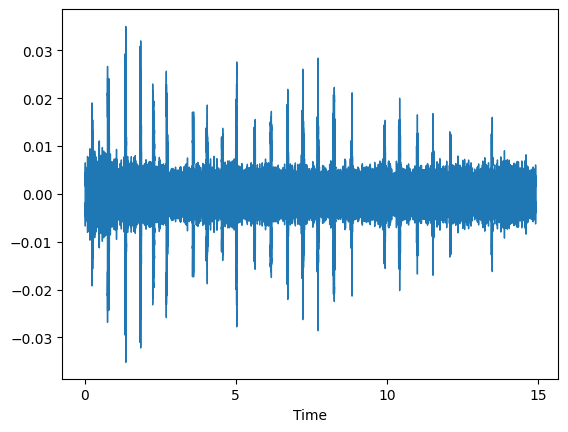

In [8]:
sample_audio=files['NorthernRaven'][0]
a,b=librosa.load(sample_audio)
librosa.display.waveshow(y=a,sr=b)

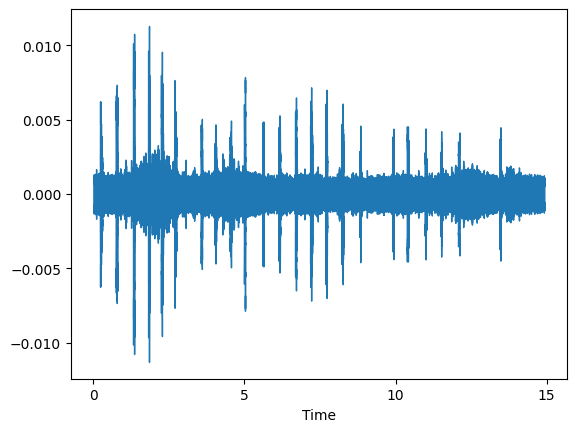

In [9]:
pre_a=preemphasis(a)
librosa.display.waveshow(y=pre_a,sr=b)

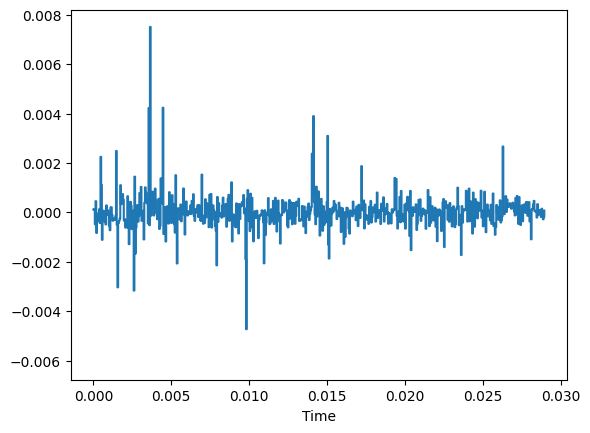

In [10]:
framed_a=frame_and_remove_silence(pre_a)
librosa.display.waveshow(y=framed_a,sr=b)

C:\Users\Harjot Singh\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1945
  warnings.warn(


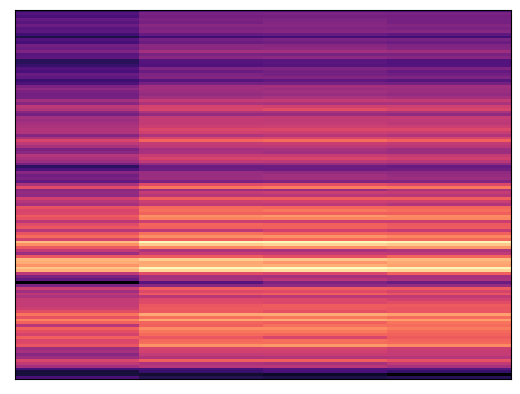

In [11]:
c=make_mel_spectrogram(framed_a,b)
librosa.display.specshow(c,sr=b)

## Generating Mel Spectrograms 

In [12]:
try:
    for bird in files:
        i = 1
        for audio in files[bird]:
            signal, sr = librosa.load(audio)

            preemphasized_signal = preemphasis(signal)
            # Frame and remove silence from the audio signal
            framed_signal = frame_and_remove_silence(preemphasized_signal)

            # Make the mel spectrogram of the framed audio signal
            mel_spectrogram = make_mel_spectrogram(framed_signal, sr)

            if not os.path.exists('./dataset/Spectrograms/'+bird):
                os.makedirs('./dataset/Spectrograms/'+bird)
            # Save the mel spectrogram
            # You can adjust the colormap if needed
            plt.imshow(mel_spectrogram, origin='lower', aspect='auto')
            plt.savefig('./dataset/Spectrograms/' +
                        bird + '/' + str(i)+'.png', format='png')
            plt.close()
            if (i == 200):
                break
            i = i+1
except Exception as e:
    print("An error occurred: {}".format(e))

C:\Users\Harjot Singh\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1944
  warnings.warn(
C:\Users\Harjot Singh\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1943
  warnings.warn(
